Data found from https://www.kaggle.com/nathanlauga/nba-games/notebooks for NBA games from 2004-2020. Kaggle data was extrated from official NBA website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("games.csv")
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,0.425,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,0.295,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,0.396,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,0.262,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,0.356,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0


In [3]:
df.shape

(23520, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23520 non-null  object 
 1   GAME_ID           23520 non-null  int64  
 2   GAME_STATUS_TEXT  23520 non-null  object 
 3   HOME_TEAM_ID      23520 non-null  int64  
 4   VISITOR_TEAM_ID   23520 non-null  int64  
 5   SEASON            23520 non-null  int64  
 6   TEAM_ID_home      23520 non-null  int64  
 7   PTS_home          23421 non-null  float64
 8   FG_PCT_home       23421 non-null  float64
 9   FT_PCT_home       23421 non-null  float64
 10  FG3_PCT_home      23421 non-null  float64
 11  AST_home          23421 non-null  float64
 12  REB_home          23421 non-null  float64
 13  TEAM_ID_away      23520 non-null  int64  
 14  PTS_away          23421 non-null  float64
 15  FG_PCT_away       23421 non-null  float64
 16  FT_PCT_away       23421 non-null  float6

In [5]:
#remove 99 games which had null data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23421 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23421 non-null  object 
 1   GAME_ID           23421 non-null  int64  
 2   GAME_STATUS_TEXT  23421 non-null  object 
 3   HOME_TEAM_ID      23421 non-null  int64  
 4   VISITOR_TEAM_ID   23421 non-null  int64  
 5   SEASON            23421 non-null  int64  
 6   TEAM_ID_home      23421 non-null  int64  
 7   PTS_home          23421 non-null  float64
 8   FG_PCT_home       23421 non-null  float64
 9   FT_PCT_home       23421 non-null  float64
 10  FG3_PCT_home      23421 non-null  float64
 11  AST_home          23421 non-null  float64
 12  REB_home          23421 non-null  float64
 13  TEAM_ID_away      23421 non-null  int64  
 14  PTS_away          23421 non-null  float64
 15  FG_PCT_away       23421 non-null  float64
 16  FT_PCT_away       23421 non-null  float6

In [6]:
#check for duplicated rows
df[df.duplicated()].shape

(0, 21)

In [7]:
#look at summary statistics
#remove scientific notation for readability
df.describe(include=np.number).apply(lambda s: s.apply(lambda x: format(x, 'g'))).transpose()
#36 point game min seems suspicious; noting it for further analysis

,count,mean,std,min,25%,50%,75%,max
GAME_ID,23421,2.16536e+07,5.54224e+06,1.03e+07,2.06007e+07,2.11004e+07,2.16003e+07,5.19001e+07
HOME_TEAM_ID,23421,1.61061e+09,8.64468,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09
VISITOR_TEAM_ID,23421,1.61061e+09,8.65597,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09
SEASON,23421,2010.99,4.87646,2003,2007,2011,2015,2020
TEAM_ID_home,23421,1.61061e+09,8.64468,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09,1.61061e+09
PTS_home,23421,102.283,12.9501,36,93,102,111,168
FG_PCT_home,23421,0.459854,0.0567699,0.25,0.42,0.459,0.5,0.684
FT_PCT_home,23421,0.758158,0.100325,0.143,0.696,0.765,0.826,1
FG3_PCT_home,23421,0.355531,0.114312,0,0.283,0.355,0.429,1
AST_home,23421,22.5361,5.15108,6,19,22,26,47


In [8]:
print("Points")
pt = list(df.PTS_home.unique())
pt.sort()
print(pt)
#36 seems to be a significant outlier
  #game was cancelled due to condensation on the court

Points
[36.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 154.0, 157.0, 158.0, 161.0, 168.0]


In [9]:
i = df[df.PTS_home==36].index
df = df.drop(i)

In [10]:
#add differentials into the df
df["PTS_dif"] = df.PTS_home - df.PTS_away
df["AST_dif"] = df.AST_home - df.AST_away
df["REB_dif"] = df.REB_home - df.REB_away
df["FG_dif"] = df.FG_PCT_home - df.FG_PCT_away
df["FG3_dif"] = df.FG3_PCT_home - df.FG3_PCT_away

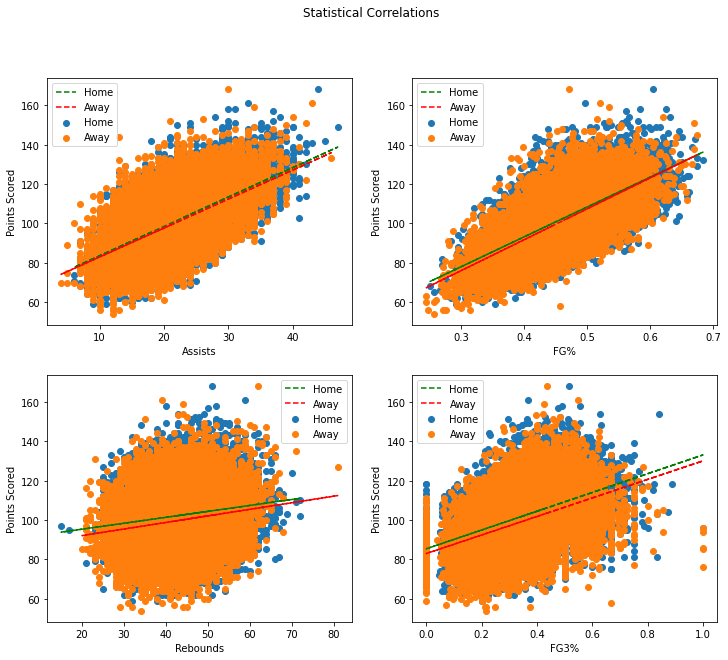

0.5834739161143399
0.16007449394594148
0.6657601401273392
0.41342732459179465


In [11]:
fig, ax = plt.subplots(2,2,sharex=False,squeeze=False)
fig.set_size_inches(12, 10)
plt.suptitle("Statistical Correlations")

#assists to points HOME
ax[0,0].scatter(df.AST_home,df.PTS_home,label="Home")
ax[0,0].set_ylabel("Points Scored")
ax[0,0].set_xlabel("Assists")

#assists to points AWAY
ax[0,0].scatter(df.AST_away,df.PTS_away,label="Away")

#Trendlines
z = np.polyfit(df.AST_home, df.PTS_home, 1)
p = np.poly1d(z)
ax[0,0].plot(df.AST_home,p(df.AST_home),"g--",label="Home")

z = np.polyfit(df.AST_away, df.PTS_away, 1)
p = np.poly1d(z)
ax[0,0].plot(df.AST_away,p(df.AST_away),"r--",label="Away")
ax[0,0].legend()

#rebounds to points HOME
ax[1,0].scatter(df.REB_home,df.PTS_home,label="Home")
ax[1,0].set_ylabel("Points Scored")
ax[1,0].set_xlabel("Rebounds")

#rebounds to points AWAY
ax[1,0].scatter(df.REB_away,df.PTS_away,label="Away")

#Trendlines
z = np.polyfit(df.REB_home, df.PTS_home, 1)
p = np.poly1d(z)
ax[1,0].plot(df.REB_home,p(df.REB_home),"g--",label="Home")

z = np.polyfit(df.REB_away, df.PTS_away, 1)
p = np.poly1d(z)
ax[1,0].plot(df.REB_away,p(df.REB_away),"r--",label="Away")
ax[1,0].legend()

#FG% to points HOME
ax[0,1].scatter(df.FG_PCT_home,df.PTS_home,label="Home")
ax[0,1].set_ylabel("Points Scored")
ax[0,1].set_xlabel("FG%")

#FG% to points AWAY
ax[0,1].scatter(df.FG_PCT_away,df.PTS_away,label="Away")

#Trendlines
z = np.polyfit(df.FG_PCT_home, df.PTS_home, 1)
p = np.poly1d(z)
ax[0,1].plot(df.FG_PCT_home,p(df.FG_PCT_home),"g--",label="Home")

z = np.polyfit(df.FG_PCT_away, df.PTS_away, 1)
p = np.poly1d(z)
ax[0,1].plot(df.FG_PCT_away,p(df.FG_PCT_away),"r--",label="Away")
ax[0,1].legend()

#FG3% to points HOME
ax[1,1].scatter(df.FG3_PCT_home,df.PTS_home,label="Home")
ax[1,1].set_ylabel("Points Scored")
ax[1,1].set_xlabel("FG3%")

#FG3% to points AWAY
ax[1,1].scatter(df.FG3_PCT_away,df.PTS_away,label="Away")

#Trendlines
z = np.polyfit(df.FG3_PCT_home, df.PTS_home, 1)
p = np.poly1d(z)
ax[1,1].plot(df.FG3_PCT_home,p(df.FG3_PCT_home),"g--",label="Home")

z = np.polyfit(df.FG3_PCT_away, df.PTS_away, 1)
p = np.poly1d(z)
ax[1,1].plot(df.FG3_PCT_away,p(df.FG3_PCT_away),"r--",label="Away")
ax[1,1].legend()

plt.show()

#r values 
print((df['AST_home'].corr(df['PTS_home'])+df['AST_away'].corr(df['PTS_away']))/2)
print((df['REB_home'].corr(df['PTS_home'])+df['REB_away'].corr(df['PTS_away']))/2)
print((df['FG_PCT_home'].corr(df['PTS_home'])+df['FG_PCT_away'].corr(df['PTS_away']))/2)
print((df['FG3_PCT_home'].corr(df['PTS_home'])+df['FG3_PCT_away'].corr(df['PTS_away']))/2)

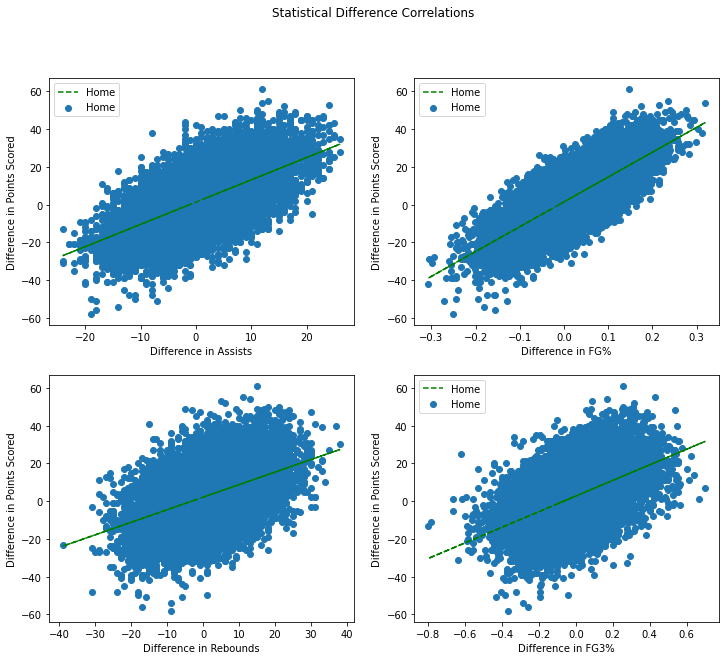

0.5991971704460214
0.44709777140355794
0.7696597212477377
0.4982346903178039


In [12]:
# Add point diff
fig, ax = plt.subplots(2,2,sharex=False,squeeze=False)
fig.set_size_inches(12, 10)
plt.suptitle("Statistical Difference Correlations")

#assists to points dif
ax[0,0].scatter(df.AST_dif,df.PTS_dif,label="Home")
ax[0,0].set_ylabel("Difference in Points Scored")
ax[0,0].set_xlabel("Difference in Assists")

#Trendline
z = np.polyfit(df.AST_dif, df.PTS_dif, 1)
p = np.poly1d(z)
ax[0,0].plot(df.AST_dif,p(df.AST_dif),"g--",label="Home")
ax[0,0].legend()

#rebounds to points dif
ax[1,0].scatter(df.REB_dif,df.PTS_dif,label="Home")
ax[1,0].set_ylabel("Difference in Points Scored")
ax[1,0].set_xlabel("Difference in Rebounds")

#Trendlines
z = np.polyfit(df.REB_dif, df.PTS_dif, 1)
p = np.poly1d(z)
ax[1,0].plot(df.REB_dif,p(df.REB_dif),"g--",label="Home")
ax[0,0].legend()

#FG% to points dif
ax[0,1].scatter(df.FG_dif,df.PTS_dif,label="Home")
ax[0,1].set_ylabel("Difference in Points Scored")
ax[0,1].set_xlabel("Difference in FG%")

#Trendlines
z = np.polyfit(df.FG_dif, df.PTS_dif, 1)
p = np.poly1d(z)
ax[0,1].plot(df.FG_dif,p(df.FG_dif),"g--",label="Home")
ax[0,1].legend()

#FG3% to points dif
ax[1,1].scatter(df.FG3_dif,df.PTS_dif,label="Home")
ax[1,1].set_ylabel("Difference in Points Scored")
ax[1,1].set_xlabel("Difference in FG3%")

#Trendlines
z = np.polyfit(df.FG3_dif, df.PTS_dif, 1)
p = np.poly1d(z)
ax[1,1].plot(df.FG3_dif,p(df.FG3_dif),"g--",label="Home")
ax[1,1].legend()

plt.show()

#r values
print(df['AST_dif'].corr(df['PTS_dif']))
print(df['REB_dif'].corr(df['PTS_dif']))
print(df['FG_dif'].corr(df['PTS_dif']))
print(df['FG3_dif'].corr(df['PTS_dif']))

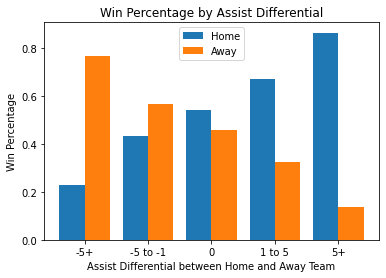

Win% when dif is zero: 0.5419354838709678


In [13]:
#calculate win percentage based on assists differential for home team
win1 = df.loc[df['AST_dif'] < -5, "HOME_TEAM_WINS"].mean()
win2 = df.loc[(df['AST_dif'] >= -5) & (df['AST_dif'] <= -1), "HOME_TEAM_WINS"].mean()
win3 = df.loc[df['AST_dif'] == 0, "HOME_TEAM_WINS"].mean()
win4 = df.loc[(df['AST_dif'] >= 1) & (df['AST_dif'] <= 5), "HOME_TEAM_WINS"].mean()
win5 = df.loc[df['AST_dif'] > 5, "HOME_TEAM_WINS"].mean()

labels = ['-5+', '-5 to -1', '0','1 to 5', '5+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('Assist Differential between Home and Away Team')
ax.set_title('Win Percentage by Assist Differential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

print("Win% when dif is zero:",df.loc[df['AST_dif'] == 0, "HOME_TEAM_WINS"].mean())

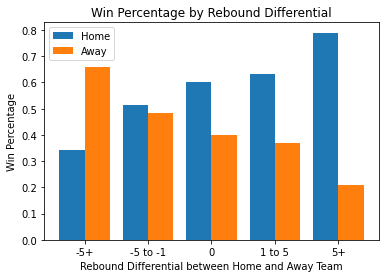

Win% when dif is zero: 0.6003937007874016
0.514815604348753


In [14]:
#calculate win percentage based on rebound differential for home team
win1 = df.loc[df['REB_dif'] < -5, "HOME_TEAM_WINS"].mean()
win2 = df.loc[(df['REB_dif'] >= -5) & (df['REB_dif'] <= -1), "HOME_TEAM_WINS"].mean()
win3 = df.loc[df['REB_dif'] == 0, "HOME_TEAM_WINS"].mean()
win4 = df.loc[(df['REB_dif'] >= 1) & (df['REB_dif'] <= 5), "HOME_TEAM_WINS"].mean()
win5 = df.loc[df['REB_dif'] > 5, "HOME_TEAM_WINS"].mean()

labels = ['-5+', '-5 to -1', '0','1 to 5', '5+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('Rebound Differential between Home and Away Team')
ax.set_title('Win Percentage by Rebound Differential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
print("Win% when dif is zero:",df.loc[df['REB_dif'] == 0, "HOME_TEAM_WINS"].mean())
print(df.loc[(df['REB_dif'] >= -5) & (df['REB_dif'] <= -1), "HOME_TEAM_WINS"].mean())

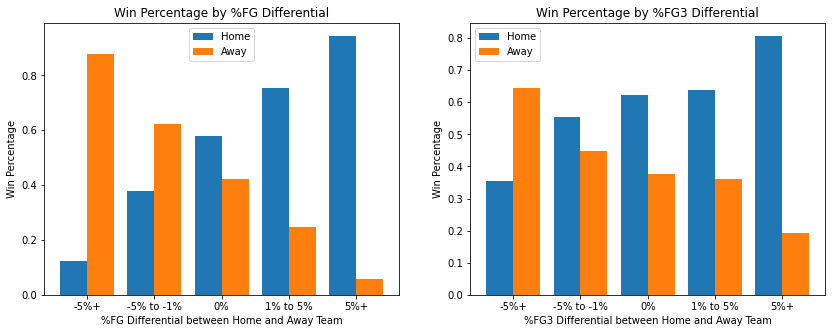

Win% when FG dif is zero: 0.5783783783783784
Win% when FG3 dif is zero: 0.6224489795918368
0.5531370038412292


In [15]:
#calculate win percentage based on FG PCT differential for home team
win1 = df.loc[df['FG_dif'] < -0.05, "HOME_TEAM_WINS"].mean()
win2 = df.loc[(df['FG_dif'] >= -0.05) & (df['FG_dif'] <= -0.01), "HOME_TEAM_WINS"].mean()
win3 = df.loc[df['FG_dif'] == 0, "HOME_TEAM_WINS"].mean()
win4 = df.loc[(df['FG_dif'] >= 0.01) & (df['FG_dif'] <= 0.05), "HOME_TEAM_WINS"].mean()
win5 = df.loc[df['FG_dif'] > 0.05, "HOME_TEAM_WINS"].mean()

labels = ['-5%+', '-5% to -1%', '0%','1% to 5%', '5%+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14, 5)
home = ax[0].bar(x - width/2, home_win_perc, width, label='Home')
away = ax[0].bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Win Percentage')
ax[0].set_xlabel('%FG Differential between Home and Away Team')
ax[0].set_title('Win Percentage by %FG Differential')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

#calculate win percentage based on FG3 PCT differential for home team
win1 = df.loc[df['FG3_dif'] < -0.05, "HOME_TEAM_WINS"].mean()
win2 = df.loc[(df['FG3_dif'] >= -0.05) & (df['FG3_dif'] <= -0.01), "HOME_TEAM_WINS"].mean()
win3 = df.loc[df['FG3_dif'] == 0, "HOME_TEAM_WINS"].mean()
win4 = df.loc[(df['FG3_dif'] >= 0.01) & (df['FG3_dif'] <= 0.05), "HOME_TEAM_WINS"].mean()
win5 = df.loc[df['FG3_dif'] > 0.05, "HOME_TEAM_WINS"].mean()

labels = ['-5%+', '-5% to -1%', '0%','1% to 5%', '5%+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

home = ax[1].bar(x - width/2, home_win_perc, width, label='Home')
away = ax[1].bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Win Percentage')
ax[1].set_xlabel('%FG3 Differential between Home and Away Team')
ax[1].set_title('Win Percentage by %FG3 Differential')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

plt.show()
print("Win% when FG dif is zero:", df.loc[df['FG_dif'] == 0, "HOME_TEAM_WINS"].mean())
print("Win% when FG3 dif is zero:", df.loc[df['FG3_dif'] == 0, "HOME_TEAM_WINS"].mean())
print(df.loc[(df['FG3_dif'] >= -0.05) & (df['FG3_dif'] <= -0.01), "HOME_TEAM_WINS"].mean())

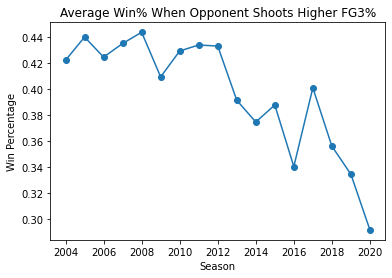

In [16]:
#Average Win% When Opponent Shoots Higher FG3%
winList = []

for a in range(2004,2021):
  winPCT = df.loc[(df['FG3_dif'] < 0) & (df['SEASON'] == a), "HOME_TEAM_WINS"].mean()
  winList.append(winPCT)

Seasons = range(2004,2021)

plt.plot(Seasons,winList,'o-')

plt.title('Average Win% When Opponent Shoots Higher FG3%')
plt.xlabel('Season')
plt.ylabel('Win Percentage')

plt.show()

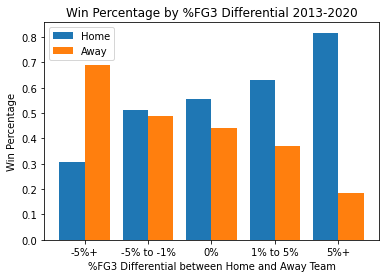

Win% when FG3 dif is zero: 0.5573770491803278


In [17]:
#calculate win percentage based on FG3 PCT differential for home team for 2013 and beyond
win1 = df.loc[(df['FG3_dif'] < -0.05) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean()
win2 = df.loc[(df['FG3_dif'] >= -0.05) & (df['FG3_dif'] <= -0.01) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean()
win3 = df.loc[(df['FG3_dif'] == 0) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean()
win4 = df.loc[(df['FG3_dif'] >= 0.01) & (df['FG3_dif'] <= 0.05) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean()
win5 = df.loc[(df['FG3_dif'] > 0.05) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean()

labels = ['-5%+', '-5% to -1%', '0%','1% to 5%', '5%+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('%FG3 Differential between Home and Away Team')
ax.set_title('Win Percentage by %FG3 Differential 2013-2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
print("Win% when FG3 dif is zero:", df.loc[(df['FG3_dif'] == 0) & (df['SEASON'] >= 2013), "HOME_TEAM_WINS"].mean())

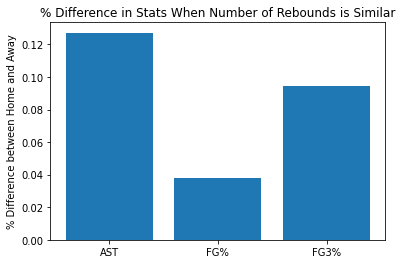

AST Weighted Contribution: 0.48951939860179833
FG% Weighted Contribution: 0.14668600392616538
FG3% Weighted Contribution: 0.36379459747203624


In [18]:
#create pct difference for each stat
df['AST_%dif'] = (df.AST_home - df.AST_away)/df.AST_away
df['REB_%dif'] = (df.REB_home - df.REB_away)/df.REB_away
df['FG_%dif'] = (df.FG_PCT_home - df.FG_PCT_away)/df.FG_PCT_away
df['FG3_%dif'] = (df.FG3_PCT_home - df.FG3_PCT_away)/df.FG3_PCT_away
df.loc[df['FG3_%dif'] > 1, 'FG3_%dif'] = 1 #replace outliers

Ast = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03), "AST_%dif"].mean()
FG = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03), "FG_%dif"].mean()
FG3 = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03), "FG3_%dif"].mean()

x_labels = ['AST','FG%','FG3%']
values = [Ast,FG,FG3]

plt.bar(x_labels, values)
plt.ylabel("% Difference between Home and Away")
plt.title("% Difference in Stats When Number of Rebounds is Similar")

plt.show()
print("AST Weighted Contribution:", Ast/sum(values))
print("FG% Weighted Contribution:", FG/sum(values))
print("FG3% Weighted Contribution:", FG3/sum(values))

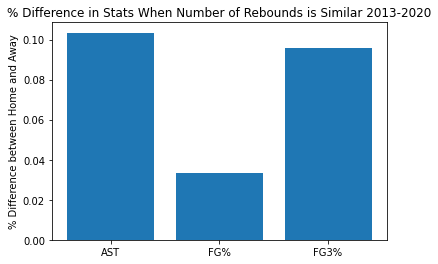

AST Weighted Contribution: 0.4445540605289945
FG% Weighted Contribution: 0.1435743253366669
FG3% Weighted Contribution: 0.4118716141343386


In [19]:
#2013-2020

Ast = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03) & (df['SEASON'] >= 2013), "AST_%dif"].mean()
FG = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03) & (df['SEASON'] >= 2013), "FG_%dif"].mean()
FG3 = df.loc[(df['REB_%dif'] < 0.03) & (df['REB_%dif'] > -0.03) & (df['SEASON'] >= 2013), "FG3_%dif"].mean()

x_labels = ['AST','FG%','FG3%']
values = [Ast,FG,FG3]

plt.bar(x_labels, values)
plt.ylabel("% Difference between Home and Away")
plt.title("% Difference in Stats When Number of Rebounds is Similar 2013-2020")

plt.show()
print("AST Weighted Contribution:", Ast/sum(values))
print("FG% Weighted Contribution:", FG/sum(values))
print("FG3% Weighted Contribution:", FG3/sum(values))